In [1]:
""" Working with parameterized gates in Cirq """

' Working with parameterized gates in Cirq '

In [2]:
import cirq, sympy
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

%matplotlib inline

In [3]:
# Get a qubit and a cirquit
qbit = cirq.LineQubit(0)
circuit = cirq.Circuit()

In [4]:
# Get a symbol
symbol = sympy.Symbol("t")

In [5]:
# Add a parameterized gate
circuit.append(cirq.XPowGate(exponent = symbol)(qbit))

# Measure
circuit.append(cirq.measure(qbit, key="z"))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


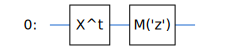

In [6]:
SVGCircuit(circuit)

In [8]:
# Get a sweep over parameter values
sweep = cirq.Linspace(key    = symbol.name,      # {"t": 0.0}
                      start  = 0.0,              # {"t": 1.0}
                      stop   = 2.0,              # {"t": 2.0}
                      length = 101)              # ...

In [10]:
# Execute the circuit for all values in the sweep
sim = cirq.Simulator()
res = sim.run_sweep(circuit, sweep, repetitions = 1000) # Executing a circuit for all values in the sweep
#print(res)

In [18]:
# Plot the measurement outcomes at each value in the sweep
angles = [x[0][1] for x in sweep.param_tuples()] # returns array [0.0, 0.02 ... 1.98 2.0]
zeroes = [res[i].histogram(key="z")[0] / 1000    # returns array [1.0 0.9 ... 0.0 ... 0.9 1.0]
          for i in range(len(res))]

Counter({0: 1000})

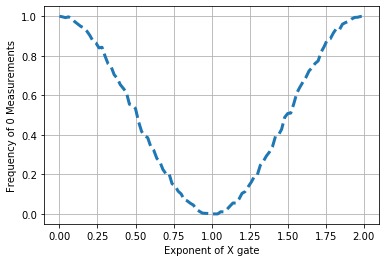

In [19]:
# Plot and formatting
plt.plot(angles, zeroes, "--", linewidth = 3)
plt.ylabel("Frequency of 0 Measurements")
plt.xlabel("Exponent of X gate")
plt.grid()

Figure shows Measurment outcomes at each value of the exponent $t \in [0,2] $ in he circuit $X^t |0\rangle$